<a href="https://colab.research.google.com/github/saurabh000007/Anomaly-Detection/blob/main/AnomalyDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#installing hdf5storage
!pip install hdf5storage

     |████████████████████████████████| 53 kB 1.1 MB/s 


In [2]:
# importing libraries
import hdf5storage
import numpy as np
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,f1_score,roc_auc_score,classification_report,roc_curve,auc

In [4]:
# getting dataset anomaly.mat
file='drive/MyDrive/Anomaly Detection/http.mat'
mat=hdf5storage.loadmat(file)

In [5]:
# separating input and output data in pandas dataframe
X=pd.DataFrame(mat['X'])
y=pd.DataFrame(mat['y'])

In [6]:
# analysing the data
X[:5]

,0,1,2
0,-2.302585,5.371103,10.716107
1,-2.302585,5.088213,8.418058
2,-2.302585,5.464255,7.113224
3,-2.302585,5.451468,7.616825
4,-2.302585,5.476882,6.186414


In [7]:
y[:5]

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [8]:
X.describe()

,0,1,2
count,567498.000000,567498.000000,567498.000000
mean,-2.268538,5.557679,7.489226
std,0.465346,0.435007,1.316983
min,-2.302585,-2.302585,-2.302585
25%,-2.302585,5.380358,6.490875
50%,-2.302585,5.517854,7.415235
75%,-2.302585,5.723912,8.372884
max,8.098369,10.906691,16.277711


In [9]:
y.describe()

,0
count,567498.000000
mean,0.003896
std,0.062297
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [10]:
# splitting dataset into test and train data..with test size 0.25
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [11]:
# training data with IForest Algorithm with contamination of 0.004(as mentioned in pdf),sub-sampling size=256 and number of estimators=100
ifor=IsolationForest(n_estimators=100,max_samples=256,contamination=0.004)
ifor.fit(X_train)

IsolationForest(behaviour='deprecated', bootstrap=False, contamination=0.004,
                max_features=1.0, max_samples=256, n_estimators=100,
                n_jobs=None, random_state=None, verbose=0, warm_start=False)

In [12]:
# defining a convert function to convert the output from {-1,1} to {0,1}
def convert(y):
    for i in range(y.shape[0]):
        if y[i]==-1:
            y[i]=1
        else:
            y[i]=0
    return y

In [13]:
# predicting model on test data and converting it to desired output range
y_pred=ifor.predict(X_test)
y_pred=convert(y_pred)

In [14]:
# anomaly score calculation on test data..0.5 added to put the scores in the range [0,1]
s=0.5-ifor.decision_function(X_test)

In [15]:
# calculating area under the curve for Receiver Operating Characteristics curve
z=roc_auc_score(y_test,s )

In [16]:
# calculating FPR(False Positive Rate),TPR(True Positive Rate) and threshold value for Receiver Operating Characteristics curve
fpr,tpr,threshold=roc_curve(y_test,s)

In [17]:
print('False Positive Rate:',fpr)
print('True Positive Rate:',tpr)
print('Threshold:',threshold)

False Positive Rate: [0.00000000e+00 0.00000000e+00 7.07729110e-06 ... 9.99957536e-01
 9.99985845e-01 1.00000000e+00]
True Positive Rate: [0.        0.0017301 0.0017301 ... 1.        1.        1.       ]
Threshold: [1.55371541 0.55371541 0.54900889 ... 0.15689908 0.1565728  0.15638731]


In [18]:
# statistical analysis
print('Report: ')
print('classification report: ')
print(classification_report(y_test,y_pred))
print('AUC_ROC:',z)
print('F1-Score: ',f1_score(y_test,y_pred))
print('confusion-matrix: ',confusion_matrix(y_test,y_pred))

Report: 
classification report: 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    141297
         1.0       0.94      0.96      0.95       578

    accuracy                           1.00    141875
   macro avg       0.97      0.98      0.97    141875
weighted avg       1.00      1.00      1.00    141875

AUC_ROC: 0.9998447587626965
F1-Score:  0.9496157130657557
confusion-matrix:  [[141260     37]
 [    22    556]]


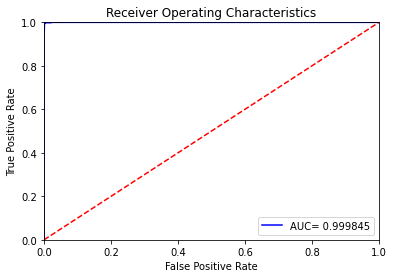

In [19]:
# visulization
plt.title('Receiver Operating Characteristics')
plt.plot(fpr,tpr,'b',label='AUC= %0.6f'%z)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

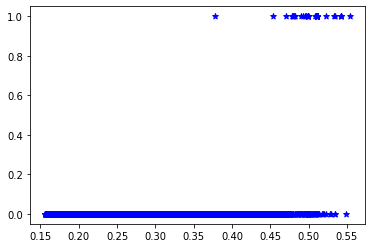

In [20]:
# plot between the computed anomaly scores and it's actual output value(y_test)
plt.scatter(s,y_test,color='blue',marker='*')

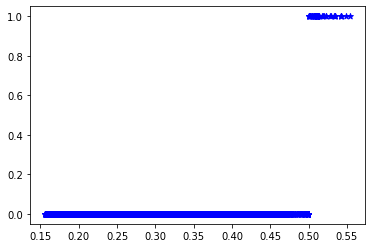

In [21]:
# plot between the computed anomaly scores and it's actual output value(y_pred)
plt.scatter(s,y_pred,color='blue',marker='*')